<a href="https://colab.research.google.com/github/kurosakiichig/glove_matrix-/blob/main/problem_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

어휘집: ['과', '는', '대표적인', '딥러닝', '머신러닝', '분과이다', '분야이다', '비전', '에서', '역할', '와', '은', '을', '의', '인공지능', '자연어', '중요한', '처리', '컴퓨터', '포함한다', '한', '한다']
주제 관련 문장: [['자연어', '처리', '는', '인공지능', '의', '한', '분야이다'], ['인공지능', '은', '머신러닝', '과', '딥러닝', '을', '포함한다'], ['자연어', '처리', '와', '컴퓨터', '비전', '은', '대표적인', '분야이다'], ['머신러닝', '은', '인공지능', '의', '중요한', '분과이다']]
주제 관련 공시출현 행렬:
 [[0.         0.         0.         1.         1.         0.
  0.         0.         0.         0.         0.         0.5
  0.5        0.         0.33333334 0.         0.         0.
  0.         0.33333334 0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.5        1.         0.5        0.         1.
  0.         0.         0.33333334 0.        ]
 [0.         0.         0.         0.         0.         0.
  1.         0.5        0.         0.         0.         1.
  0.         0.         0.         0.         0.         0.


<ipython-input-6-c0cbd56599e9>:94: UserWarning: Glyph 45716 (\N{HANGUL SYLLABLE NEUN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-6-c0cbd56599e9>:94: UserWarning: Glyph 50752 (\N{HANGUL SYLLABLE WA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-6-c0cbd56599e9>:94: UserWarning: Glyph 51064 (\N{HANGUL SYLLABLE IN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-6-c0cbd56599e9>:94: UserWarning: Glyph 44277 (\N{HANGUL SYLLABLE GONG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-6-c0cbd56599e9>:94: UserWarning: Glyph 51648 (\N{HANGUL SYLLABLE JI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-6-c0cbd56599e9>:94: UserWarning: Glyph 45733 (\N{HANGUL SYLLABLE NEUNG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-6-c0cbd56599e9>:94: UserWarning: Glyph 52376 (\N{HANGUL SYLLABLE CEO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-inp

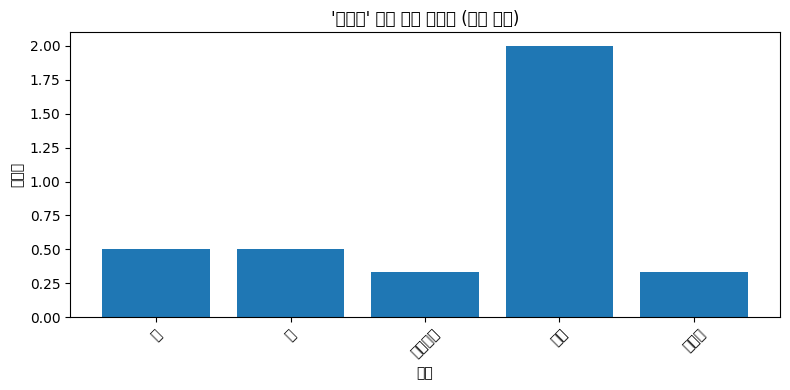

In [6]:

import numpy as np
import matplotlib.pyplot as plt
import math


corpus = [
    "자연어 처리 는 인공지능 의 한 분야이다",
    "인공지능 은 머신러닝 과 딥러닝 을 포함한다",
    "자연어 처리 와 컴퓨터 비전 은 대표적인 분야이다",
    "딥러닝 은 컴퓨터 비전 에서 중요한 역할 을 한다",
    "머신러닝 은 인공지능 의 중요한 분과이다"
]


def tokenize(text):
    return text.split()


tokenized_corpus = [tokenize(sentence) for sentence in corpus]


vocab = sorted(set(word for sentence in tokenized_corpus for word in sentence))
word2idx = {word: idx for idx, word in enumerate(vocab)}

print("어휘집:", vocab)


def linear_weight(distance):
    return 1.0 / distance

def build_weighted_cooccurrence_matrix(tokenized_corpus, word2idx, window_size=3, weight_func=linear_weight):
    vocab_size = len(word2idx)
    co_matrix = np.zeros((vocab_size, vocab_size), dtype=np.float32)


    for sentence in tokenized_corpus:
        for i, word in enumerate(sentence):
            center_idx = word2idx[word]

            for j in range(max(0, i - window_size), min(len(sentence), i + window_size + 1)):
                if i != j:
                    distance = abs(i - j)
                    weight = weight_func(distance)
                    context_idx = word2idx[sentence[j]]
                    co_matrix[center_idx, context_idx] += weight
    return co_matrix


theme_words = ['자연어', '처리', '인공지능']


theme_sentences = [sentence for sentence in tokenized_corpus if any(word in sentence for word in theme_words)]
print("주제 관련 문장:", theme_sentences)


theme_co_matrix = build_weighted_cooccurrence_matrix(theme_sentences, word2idx, window_size=3, weight_func=linear_weight)
print("주제 관련 공시출현 행렬:\n", theme_co_matrix)


def get_theme_related_pairs(co_matrix, word2idx, theme_words, top_n=5):
    pairs = {}
    for word in theme_words:
        if word in word2idx:
            idx = word2idx[word]
            weights = co_matrix[idx, :]

            word_weights = {vocab[i]: weights[i] for i in range(len(weights)) if weights[i] > 0}

            sorted_words = sorted(word_weights.items(), key=lambda x: x[1], reverse=True)[:top_n]
            pairs[word] = sorted_words
    return pairs

theme_pairs = get_theme_related_pairs(theme_co_matrix, word2idx, theme_words, top_n=5)
for word, pairs in theme_pairs.items():
    print(f"주제 단어 '{word}'의 관련 단어:", pairs)

target_word = '자연어'
if target_word in word2idx:
    target_idx = word2idx[target_word]
    weights = theme_co_matrix[target_idx, :]

    related_words = {vocab[i]: weights[i] for i in range(len(weights)) if weights[i] > 0 and vocab[i] != target_word}

    plt.figure(figsize=(8, 4))
    plt.bar(list(related_words.keys()), list(related_words.values()))
    plt.title(f"'{target_word}' 관련 단어 가중치 (주제 문장)")
    plt.xlabel("단어")
    plt.ylabel("가중치")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
else:
    print(f"어휘집에 '{target_word}'가 없습니다.")
